In [26]:
import importlib

import numpy as np
import matplotlib.pyplot as plt

import BlackScholes
importlib.reload(BlackScholes)
from BlackScholes import BlackScholes

from Black76 import Black76

### Checking put-call parity

In [24]:
model_BS = BlackScholes(sigma=0.2, r=0.1)

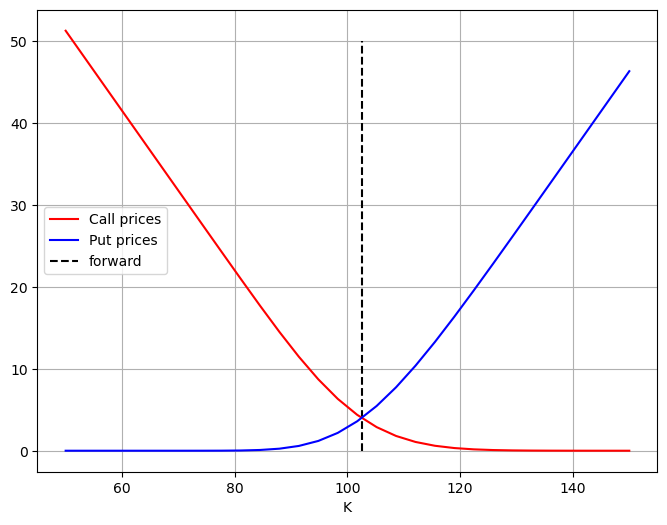

In [25]:
K = np.linspace(50, 150, 30)
S_0 = 100
T = 0.25

call_prices = model_BS.vanilla_price(T=T, K=K, S=S_0, flag='c')
put_prices = model_BS.vanilla_price(T=T, K=K, S=S_0, flag='p')
forward = S_0 * np.exp(model_BS.r * T)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(K, call_prices, "r", label='Call prices')
ax.plot(K, put_prices, "b", label='Put prices')
ax.vlines(forward, 0, 50, 'k', ls='--', label='forward')
ax.grid()
ax.set_xlabel("K")
ax.legend()


## Pricing vanilla

In [29]:
S_0=92.800000
T=0.412000
K=93.720000
r=0.050000
sigma=0.162700
flag = 'c'

model = BlackScholes(sigma=sigma, r=r)
model.vanilla_price(T, K, S_0, flag)

4.3596128526479845

### Greeks

In [7]:
print('Option delta:', model.delta(T, K, S_0, flag))
print('Option gamma:', model.gamma(T, K, S_0))
print('Option vega:', model.vega(T, K, S_0))

Option delta: 0.6192493561365132
Option gamma: 0.03501776158512925
Option vega: 34.256258124762475


### Pricing vanilla with dividends

In [55]:
S_0=94.330000 
T=0.921000
K=98.140000
r=0.092000
q=0.003000
sigma=0.206100
flag = 'c'

F_0 = S_0*np.exp((r - q)*T)
model = Black76(sigma=sigma, r=r)
model.vanilla_price(T, K, F_0, flag)

9.373699945466912

## Monte Carlo test for vanilla options

In [ ]:
S_0 = 91.630000
T = 0.559000
K = 94.19000
r = 0.063000
q = 0.000000
sigma = 0.264400
flag = 'c'

model = BlackScholes(sigma=sigma, r=r)
model.vanilla_price(T, K, S_0, flag)

7.542063802537719

In [ ]:
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, S_0)

np.exp(-r * T) * np.maximum(trajs - K, 0).mean()

7.544134826501981

In [ ]:
S_0 = 91.630000
T = 0.559000
K = 94.19000
r = 0.063000
q = 0.000000
sigma = 0.264400
flag = 'c'

model = Black76(sigma=sigma, r=r)
model.vanilla_price(T, K, S_0 * np.exp(r * T), flag)

7.542063802537723

In [ ]:
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, S_0*np.exp(r*T))

np.exp(-r * T) * np.maximum(trajs - K, 0).mean()

7.542804454057484

## 3d Black-Scholes simulation

In [9]:
import importlib
import numpy as np
import BlackScholes
importlib.reload(BlackScholes)
from BlackScholes import BlackScholes

In [10]:
rng = np.random.default_rng()

In [11]:
rho = 0.90
r = 0.05
cov_mat = np.ones((3, 3)) * rho + (1 - rho) * np.eye(3)

model = BlackScholes(sigma=cov_mat, r=r)

In [12]:
S_0 = np.ones(3) * 100
t_grid = np.linspace(0, 1, 10000)

trajs = model.simulate_trajectory(
    n_sample=20,
    t_grid=t_grid,
    init_val=S_0,
    random_state=rng
)

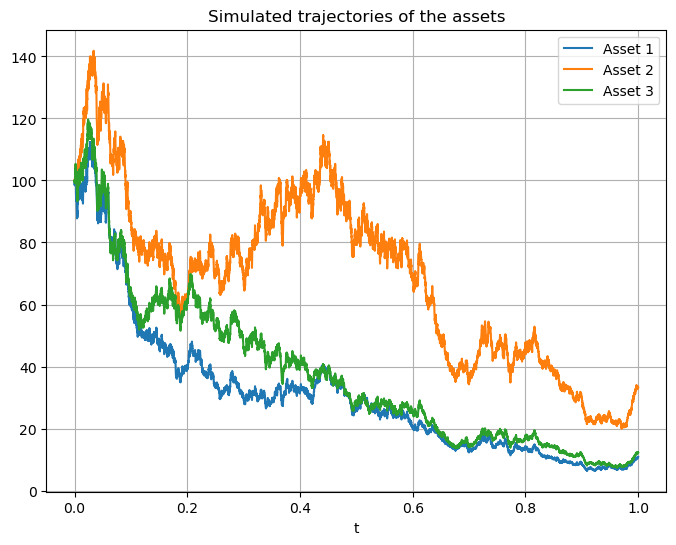

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

idx_traj = 0

ax.plot(t_grid, trajs[idx_traj, 0], label='Asset 1')
ax.plot(t_grid, trajs[idx_traj, 1], label='Asset 2')
ax.plot(t_grid, trajs[idx_traj, 2], label='Asset 3')
ax.set_title('Simulated trajectories of the assets')
ax.set_xlabel('t')
ax.legend()
ax.grid()

### Estimation of the covariance matrix

In [17]:
dt = t_grid[1] - t_grid[0]
print('Estimated covariance matrix:\n', np.cov(np.diff(np.log(trajs) / np.sqrt(dt), axis=-1)[0]))
print('True covariance matrix:\n', cov_mat)

Estimated covariance matrix:
 [[1.00445205 0.91090171 0.90542643]
 [0.91090171 1.01699112 0.9096463 ]
 [0.90542643 0.9096463  1.00232726]]
True covariance matrix:
 [[1.  0.9 0.9]
 [0.9 1.  0.9]
 [0.9 0.9 1. ]]


## Implied volatility

In [38]:
import implied_vol
importlib.reload(implied_vol)
from implied_vol import black_scholes_iv, black_iv

from Black76 import Black76

In [57]:
T=0.577000; K=98.250000

S_0=97.380000
r=0.019000
q=0.061000

call_price = 5.266606
flag = 'c'

F = np.exp((r - q) * T) * S_0

black_iv(call_price, T, K, F, r, flag)

array(0.2327)

### Implied volatility testing

In [29]:
r = 0.05
sigma = 0.25
S = 100
K = np.linspace(80, 120, 40)[None, :]
T = np.array([0.5, 1, 1.5, 2])[:, None]

F = S * np.exp(r * T)

model_BS = BlackScholes(sigma=sigma, r=r)
model_Black = Black76(sigma=sigma, r=r)

call_prices_BS = model_BS.vanilla_price(T, K, S, 'c')
call_prices_Black = model_Black.vanilla_price(T, K, S * np.exp(r * T), 'c')

max(
    np.max(np.abs(black_scholes_iv(call_prices_BS, T, K, S, r, 'c', method='Newton') - sigma)), 
    np.max(np.abs(black_iv(call_prices_Black, T, K, F, r, 'c', method='Newton') - sigma))
)

9.498649089501043e-10

## Pricing via Black-Scholes

### Power option

The option with payoff $(S_T^p - K)_+$. Its price is given by the BS formula with $\hat \sigma = p\sigma$ and $\tilde S_0 = S_0^p\exp\left\{p\left(r - \dfrac{\sigma^2}{2}\right)T - \left(r - \dfrac{\tilde\sigma^2}{2}\right)T\right\}$.

In [31]:
def power_vanilla_BS(T, K, S_0, flag, sigma, r, q, p):
    sigma_tilde = p * sigma
    S_0_tilde = S_0**p * np.exp(p*(r - q - 0.5*sigma**2)*T - (r - 0.5*sigma_tilde**2)*T)
    model = BlackScholes(sigma=sigma_tilde, r=r)
    return model.vanilla_price(T, K, S_0_tilde, flag)

In [56]:
p=3
S_0=0.950000
T=0.630000
K=0.980000
r=0.013000
q=0.056000
sigma=0.146100

flag = 'c'
power_vanilla_BS(T, K, S_0, flag, sigma, r, q, p)

0.06064270251315104

MC check

In [36]:
model = BlackScholes(sigma=sigma, r=r)
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, S_0)

np.exp(-r * T) * np.maximum((trajs * np.exp(-q * T))**p - K, 0).mean()

0.02672507668648535

### Displaced log-normal

Stock price dynamics:
$$
dS_t = \sigma (S_t + a)dW_t
$$
Vanilla option prices are given by the BS formula with $\tilde S_0 = S_0 + a, \tilde K = K + a$.

In [51]:
def dln_vanilla_BS(T, K, S_0, flag, sigma, r, a):
    S_0_tilde = S_0 + a
    K_tilde = K + a
    model = BlackScholes(sigma=sigma, r=r)
    return model.vanilla_price(T, K_tilde, S_0_tilde, flag)

In [58]:
S_0=91.610000; T=0.856000; K=98.270000; sigma=0.245100; a=20.780000

flag = 'c'
r = 0

dln_vanilla_BS(T, K, S_0, flag, sigma, r, a)

7.449739286524064

MC check

In [48]:
model = BlackScholes(sigma=sigma, r=r)
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, S_0)

np.exp(-r * T) * np.maximum(trajs * (1 + a / S_0) - a - K, 0).mean()

4.303025724556819

In [59]:
t = 2.84
s = 1.03
t*s + 2 * s**2

5.047